# Visualizing the mouse behavior (modified from fig4.1)

In [1]:
import sys
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
%matplotlib inline 

## load in csv files (from running exportTrials.m)

### Mouse data

In [2]:
control = pd.read_csv('/Users/Sabatini Lab/GitHub/mouse_bandit/data/mike_data/trial_data/control.csv',index_col=0)
sst = pd.read_csv('/Users/Sabatini Lab/GitHub/mouse_bandit/data/mike_data/trial_data/sst.csv',index_col=0)
#data70 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_7030_02192017.csv',index_col=0)

## Collapse into single df

In [3]:
control['Condition'] = 'control'
sst['Condition'] = 'sst'
#data70['Condition'] = '70-30'

datas = control.append(sst)
#datas = datas.append(data70)

In [4]:
datas.shape

(14757, 65)

In [5]:
datas.tail (10)

,Mouse ID,Session ID,Trial,Block Trial,Block Reward,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,...,1_trialDuration,1_laser,0_ITI,0_trialDuration,Decision,Switch,Higher p port,Reward,Laser,Condition
3673,SOM42,07202017_SOM42,536,26,22,18,7,1,1,2.557,...,0.553,1,1.473,0.576,1,0,1,0,0,sst
3674,SOM42,07202017_SOM42,537,27,22,19,-1,1,1,1.983,...,0.576,0,1.171,0.457,1,0,1,1,0,sst
3675,SOM42,07202017_SOM42,538,28,23,20,1,1,0,2.039,...,0.457,0,1.479,0.415,1,0,1,1,0,sst
3676,SOM42,07202017_SOM42,539,29,24,21,2,1,1,1.999,...,0.415,0,2.815,0.498,1,0,1,1,0,sst
3677,SOM42,07202017_SOM42,540,30,25,22,3,1,1,1.990,...,0.498,0,2.250,0.366,1,0,1,1,0,sst
3678,SOM42,07202017_SOM42,541,31,26,23,4,1,1,2.614,...,0.366,0,3.028,0.546,1,0,1,0,0,sst
3679,SOM42,07202017_SOM42,542,32,26,24,-1,1,1,1.610,...,0.546,0,2.209,0.631,1,0,1,1,0,sst
3680,SOM42,07202017_SOM42,543,33,27,25,1,1,1,2.615,...,0.631,0,2.186,0.597,1,0,1,1,0,sst
3681,SOM42,07202017_SOM42,544,34,28,26,2,1,1,2.245,...,0.597,0,2.099,0.465,1,0,1,0,0,sst
3682,SOM42,07202017_SOM42,545,35,28,27,-1,1,1,2.235,...,0.465,0,2.603,0.428,0,1,0,0,0,sst


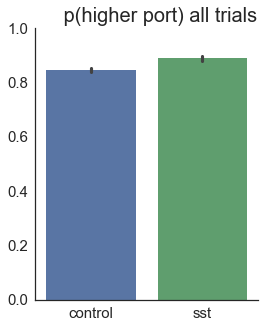

In [81]:
sns.set_style('white')
plt.figure(figsize=(4,5))
sns.barplot(x='Condition',y='Higher p port',data=datas,n_boot = 1000,ci=95)
plt.ylim(0,1)
plt.title('     p(higher port) all trials',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('fraction switch trials',fontsize=15)
plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

# Compare p(switch) in different trial types 

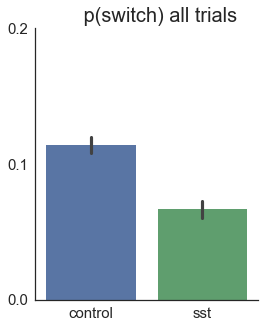

In [8]:
sns.set_style('white')
plt.figure(figsize=(4,5))
sns.barplot(x='Condition',y='Switch',data=datas,n_boot = 1000,ci=95)
plt.ylim(0,0.2)
plt.title('     p(switch) all trials',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks([0,0.1,0.2],fontsize=15)
plt.ylabel('fraction switch trials',fontsize=15)
plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

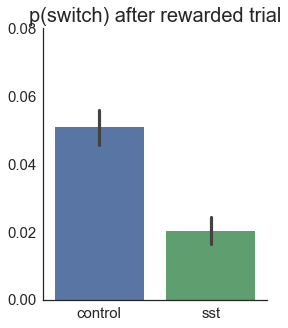

In [10]:
sns.set_style('white')
fontsize=15
plt.figure(figsize=(4,5))
sns.barplot(x='Condition',y='Switch',data=datas[datas['1_Reward']==1],n_boot = 1000,ci=95)
plt.ylim(0,0.08)
plt.title('p(switch) after rewarded trial',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.02,0.04,0.06,0.08],fontsize=fontsize)#plt.ylabel('fraction switch trials',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

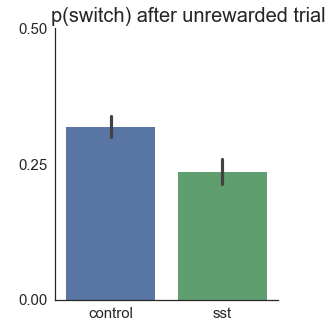

In [11]:
plt.figure(figsize=(4,5))
fontsize=15
sns.barplot(x='Condition',y='Switch',data=datas[datas['1_Reward']==0],n_boot = 1000,ci=95)
plt.ylim(0,0.5)
plt.title('        p(switch) after unrewarded trial',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.25,0.5],fontsize=fontsize)
plt.ylabel('fraction switch trials',fontsize=fontsize)
plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

## Stats for p(switch) after unrewarded trial

In [12]:
d = datas[((datas['Condition']=='control') & (datas['1_Reward']==0))]
u9 = d['Switch'].mean()
s9 = d['Switch'].std() / np.sqrt(d.shape[0])

d = datas[((datas['Condition']=='sst') & (datas['1_Reward']==0))]
u8 = d['Switch'].mean()
s8 = d['Switch'].std() / np.sqrt(d.shape[0])

#d = datas[((datas['Condition']=='70-30') & (datas['1_Reward']==0))]
#u7 = d['Switch'].mean()
#s7 = d['Switch'].std() / np.sqrt(d.shape[0]) 

print('control: %.03f sem %.03f' % (u9,s9))
print('sst: %.03f sem %.03f' % (u8,s8))
#print('70-30: %.03f pm %.03f' % (u7,s7))

control: 0.318 sem 0.010
sst: 0.235 sem 0.012


## Stats for p(switch) after rewarded trial

In [13]:
d = datas[((datas['Condition']=='control') & (datas['1_Reward']==1))]
u9 = d['Switch'].mean()
s9 = d['Switch'].std() / np.sqrt(d.shape[0])

d = datas[((datas['Condition']=='sst') & (datas['1_Reward']==1))]
u8 = d['Switch'].mean()
s8 = d['Switch'].std() / np.sqrt(d.shape[0])

#d = datas[((datas['Condition']=='70-30') & (datas['1_Reward']==1))]
#u7 = d['Switch'].mean()
#s7 = d['Switch'].std() / np.sqrt(d.shape[0]) 

print('control: %.03f pm %.03f' % (u9,s9))
print('sst: %.03f pm %.03f' % (u8,s8))
#print('70-30: %.03f pm %.03f' % (u7,s7))

control: 0.051 pm 0.003
sst: 0.020 pm 0.002


## p(switch) on laser trials

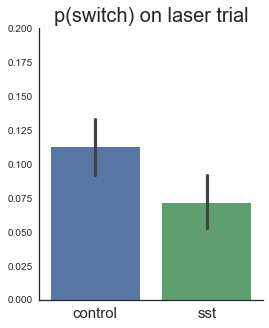

In [14]:
sns.set_style('white')
fontsize=15
plt.figure(figsize=(4,5))
sns.barplot(x='Condition',y='Switch',data=datas[datas['Laser']==1],n_boot = 1000,ci=95)
plt.ylim(0,0.2)
plt.title('p(switch) on laser trial',fontsize=20)
plt.xticks(fontsize=fontsize)
#plt.yticks([0,0.02,0.04],fontsize=fontsize)#plt.ylabel('fraction switch trials',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

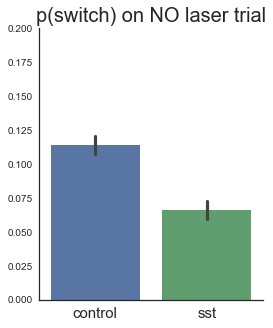

In [15]:
sns.set_style('white')
fontsize=15
plt.figure(figsize=(4,5))
sns.barplot(x='Condition',y='Switch',data=datas[datas['Laser']==0],n_boot = 1000,ci=95)
plt.ylim(0,0.2)
plt.title('p(switch) on NO laser trial',fontsize=20)
plt.xticks(fontsize=fontsize)
#plt.yticks([0,0.02,0.04],fontsize=fontsize)#plt.ylabel('fraction switch trials',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

## p(switch) vs Port streak following reward or no reward

['control' 'sst']


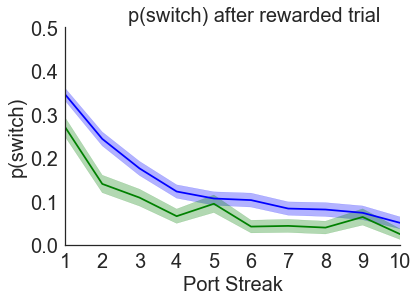

In [16]:
conditions = np.unique(datas['Condition'].values)
print(conditions)
colors = ['blue','green']

for j,condition in enumerate(conditions):
    data = datas[datas['Condition'] == condition].copy()
    port_streaks = np.unique(data['Port Streak'].values)
    p_switch = np.zeros((port_streaks.shape[0],2))

    for i,streak in enumerate(port_streaks):
            switches = data[data['Port Streak'] == streak]['Switch']
            p_switch[i,0] = switches.mean()
            p_switch[i,1] = switches.std() / np.sqrt(switches.shape[0])

    plt.plot(port_streaks,p_switch[:,0],color=colors[j])
    plt.fill_between(x=port_streaks,y1=p_switch[:,0]+p_switch[:,1],y2=p_switch[:,0]-p_switch[:,1],color=colors[j],alpha=0.3)
    plt.title('        p(switch) after rewarded trial',fontsize=20)
    plt.xlabel('Port Streak',fontsize=20)
    plt.ylabel('p(switch)',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5],fontsize=20)
    plt.xlim(1,10)
    plt.ylim(0,0.5)
    
sns.despine()

['control' 'sst']


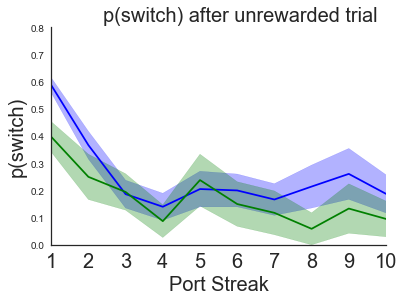

In [17]:
conditions = np.unique(datas['Condition'].values)
print(conditions)
colors = ['blue','green']
fontsize=20

for j,condition in enumerate(conditions):
    data = datas[((datas['Condition'] == condition) & (datas['Reward Streak'] == -1))].copy()
    port_streaks = np.unique(data['Port Streak'].values)
    p_switch = np.zeros((port_streaks.shape[0],2))

    for i,streak in enumerate(port_streaks):
            switches = data[data['Port Streak'] == streak]['Switch']
            p_switch[i,0] = switches.mean()
            p_switch[i,1] = switches.std() / np.sqrt(switches.shape[0])

    plt.plot(port_streaks,p_switch[:,0],color=colors[j])
    plt.fill_between(x=port_streaks,y1=p_switch[:,0]+p_switch[:,1],y2=p_switch[:,0]-p_switch[:,1],color=colors[j],alpha=0.3)
    plt.title('        p(switch) after unrewarded trial',fontsize=20)
    plt.xlabel('Port Streak',fontsize=fontsize)
    plt.ylabel('p(switch)',fontsize=fontsize)
    plt.xticks(fontsize=20)
    #plt.yticks([0,0.1,0.2,0.3],fontsize=fontsize)
    plt.xlim(1,10)
    plt.ylim(0,0.8)


sns.despine()

# Compare to win-stay lose-switch

['control' 'sst']


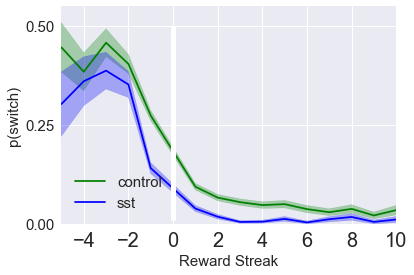

In [6]:
conditions = np.unique(datas['Condition'].values)
print(conditions)
colors = ['green','blue']
fontsize = 15

for j,condition in enumerate(conditions):
    data = datas[datas['Condition'] == condition].copy()
    reward_streaks = np.unique(data['Reward Streak'].values)
    p_switch = np.zeros((reward_streaks.shape[0],2))

    for i,streak in enumerate(reward_streaks):
            switches = data[data['Reward Streak'] == streak]['Switch']
            p_switch[i,0] = switches.mean()
            p_switch[i,1] = switches.std() / np.sqrt(switches.shape[0])

    plt.plot(reward_streaks,p_switch[:,0],color=colors[j],label=condition)
    plt.fill_between(x=reward_streaks,y1=p_switch[:,0]+p_switch[:,1],y2=p_switch[:,0]-p_switch[:,1],color=colors[j],alpha=0.3)
    plt.xlabel('Reward Streak',fontsize=fontsize)
    plt.ylabel('p(switch)',fontsize=fontsize)
    plt.yticks([0,0.25,0.5,0.75],fontsize=fontsize)
    plt.ylim(0,0.55)
    plt.xticks(fontsize=20)
    plt.xlim(-5,10)
    plt.legend(loc='best',fontsize=fontsize)
    #plt.yticks([0,0.1,0.2,0.3],fontsize=20)
    plt.vlines(x=0,ymin=0.01,ymax=0.5,color='white',linewidth=5,zorder=10)

    sns.despine()

## Laser stim w/ different previous reward histories (-2)

In [25]:
boolean_1R_2R = ((datas['1_Port']==1) & (datas['2_Port'] == 1) & (datas['1_Reward']==1) & (datas['2_Reward']==1) & (datas['Condition']=='sst'))
boolean_1R_2NR = ((datas['1_Port']==1) & (datas['2_Port'] == 1) & (datas['1_Reward']==1) & (datas['2_Reward']==0) & (datas['Condition']=='sst'))
boolean_1NR_2R = ((datas['1_Port']==1) & (datas['2_Port'] == 1) & (datas['1_Reward']==0) & (datas['2_Reward']==1) & (datas['Condition']=='sst'))
boolean_1NR_2NR = ((datas['1_Port']==1) & (datas['2_Port'] == 1) & (datas['1_Reward']==0) & (datas['2_Reward']==0) & (datas['Condition']=='sst'))

Rboolean_1R_2R = ((datas['1_Port']==0) & (datas['2_Port'] == 0) & (datas['1_Reward']==1) & (datas['2_Reward']==1) & (datas['Condition']=='sst'))
Rboolean_1R_2NR = ((datas['1_Port']==0) & (datas['2_Port'] == 0) & (datas['1_Reward']==1) & (datas['2_Reward']==0) & (datas['Condition']=='sst'))
Rboolean_1NR_2R = ((datas['1_Port']==0) & (datas['2_Port'] == 0) & (datas['1_Reward']==0) & (datas['2_Reward']==1) & (datas['Condition']=='sst'))
Rboolean_1NR_2NR = ((datas['1_Port']==0) & (datas['2_Port'] == 0) & (datas['1_Reward']==0) & (datas['2_Reward']==0) & (datas['Condition']=='sst'))

In [31]:
sstcount= (datas['Condition']=='sst')
controlcount= (datas['Condition']=='control')

datas[sstcount].shape, datas[controlcount].shape

((5620, 65), (9137, 65))

In [26]:
datas[boolean_1R_2R].shape,datas[boolean_1R_2NR].shape,datas[boolean_1NR_2R].shape,datas[boolean_1NR_2NR].shape, #left port

((2010, 65), (229, 65), (281, 65), (183, 65))

In [27]:
datas[Rboolean_1R_2R].shape,datas[Rboolean_1R_2NR].shape,datas[Rboolean_1NR_2R].shape,datas[Rboolean_1NR_2NR].shape, # right port

((1881, 65), (217, 65), (294, 65), (210, 65))

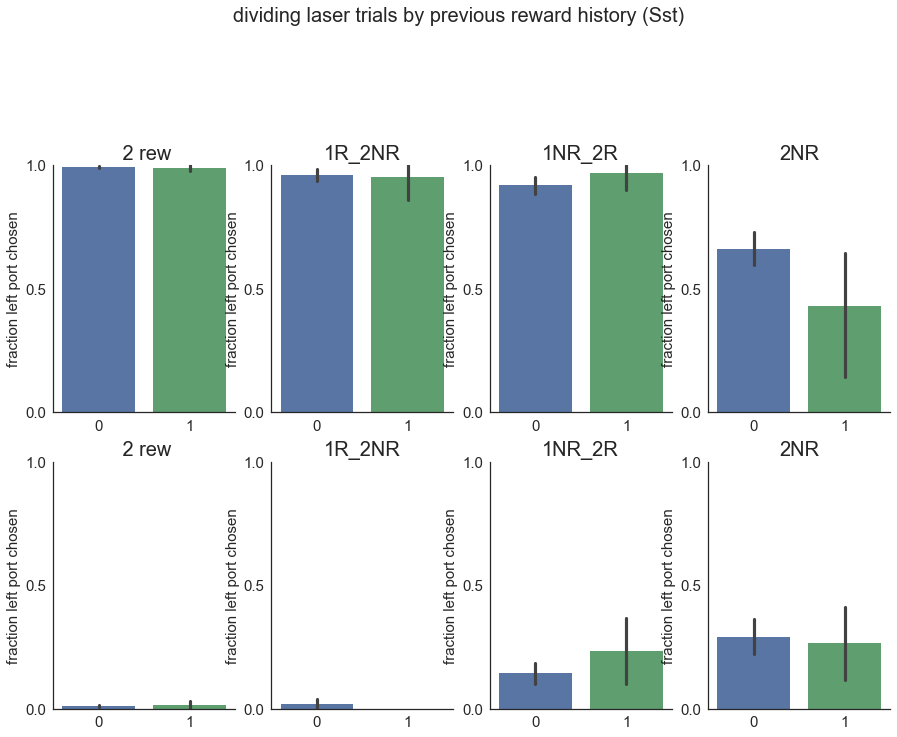

In [17]:
plt.figure(figsize=(15,10))
plt.suptitle('dividing laser trials by previous reward history (Sst)',x=0.5,y=1.1,fontsize=20)

sns.set_style('white')
fontsize=15

plt.subplot(241)
sns.barplot(x='Laser',y='Decision',data = datas[boolean_1R_2R] )
plt.ylim(0,1)
plt.title(' 2 rew',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(242)
sns.barplot(x='Laser',y='Decision',data = datas[boolean_1R_2NR] )
plt.ylim(0,1)
plt.title('1R_2NR',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(243)
sns.barplot(x='Laser',y='Decision',data = datas[boolean_1NR_2R] )
plt.ylim(0,1)
plt.title('1NR_2R',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(244)
sns.barplot(x='Laser',y='Decision',data = datas[boolean_1NR_2NR] )
plt.ylim(0,1)
plt.title('2NR',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

## right port in last two trials

plt.subplot(245)
sns.barplot(x='Laser',y='Decision',data = datas[Rboolean_1R_2R] )
plt.ylim(0,1)
plt.title(' 2 rew',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(246)
sns.barplot(x='Laser',y='Decision',data = datas[Rboolean_1R_2NR] )
plt.ylim(0,1)
plt.title('1R_2NR',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(247)
sns.barplot(x='Laser',y='Decision',data = datas[Rboolean_1NR_2R] )
plt.ylim(0,1)
plt.title('1NR_2R',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(248)
sns.barplot(x='Laser',y='Decision',data = datas[Rboolean_1NR_2NR] )
plt.ylim(0,1)
plt.title('2NR',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()


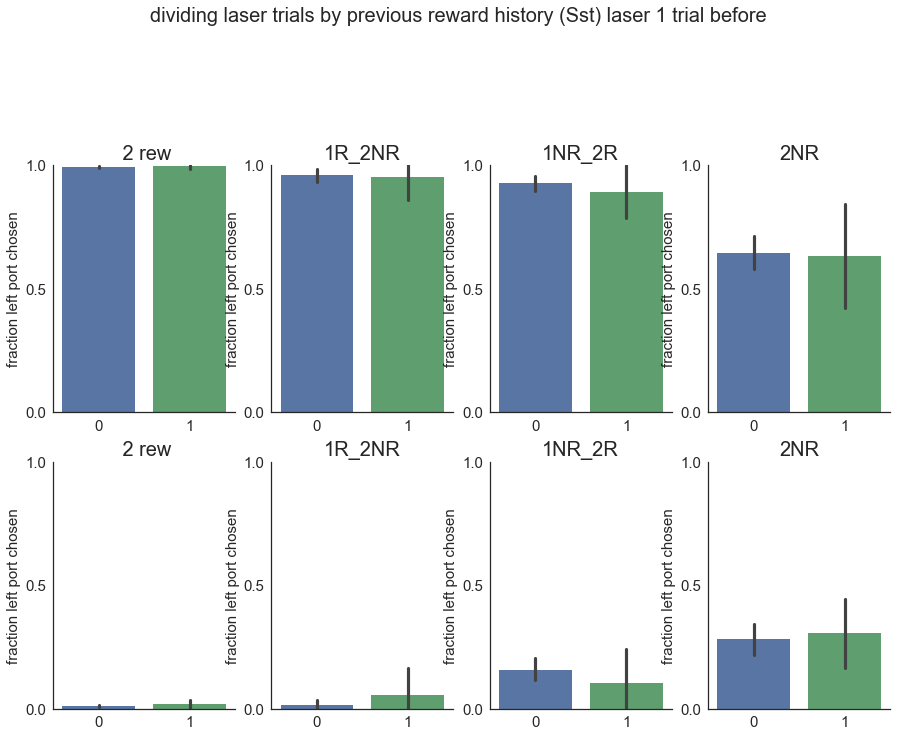

In [19]:
plt.figure(figsize=(15,10))
plt.suptitle('dividing laser trials by previous reward history (Sst) laser 1 trial before',x=0.5,y=1.1,fontsize=20)

sns.set_style('white')
fontsize=15

plt.subplot(241)
sns.barplot(x='1_laser',y='Decision',data = datas[boolean_1R_2R] )
plt.ylim(0,1)
plt.title(' 2 rew',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(242)
sns.barplot(x='1_laser',y='Decision',data = datas[boolean_1R_2NR] )
plt.ylim(0,1)
plt.title('1R_2NR',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(243)
sns.barplot(x='1_laser',y='Decision',data = datas[boolean_1NR_2R] )
plt.ylim(0,1)
plt.title('1NR_2R',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(244)
sns.barplot(x='1_laser',y='Decision',data = datas[boolean_1NR_2NR] )
plt.ylim(0,1)
plt.title('2NR',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

## right port in last two trials

plt.subplot(245)
sns.barplot(x='1_laser',y='Decision',data = datas[Rboolean_1R_2R] )
plt.ylim(0,1)
plt.title(' 2 rew',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(246)
sns.barplot(x='1_laser',y='Decision',data = datas[Rboolean_1R_2NR] )
plt.ylim(0,1)
plt.title('1R_2NR',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(247)
sns.barplot(x='1_laser',y='Decision',data = datas[Rboolean_1NR_2R] )
plt.ylim(0,1)
plt.title('1NR_2R',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(248)
sns.barplot(x='1_laser',y='Decision',data = datas[Rboolean_1NR_2NR] )
plt.ylim(0,1)
plt.title('2NR',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

#fig_name = '/Users/Sabatini Lab/GitHub/mouse_bandit/figures/reward_hist_sst_laser_1.eps'
#plt.savefig(fig_name, format='eps', dpi=1000)

## control group

In [12]:
C_boolean_1R_2R = ((datas['1_Port']==1) & (datas['2_Port'] == 1) & (datas['1_Reward']==1) & (datas['2_Reward']==1) & (datas['Condition']=='control'))
C_boolean_1R_2NR = ((datas['1_Port']==1) & (datas['2_Port'] == 1) & (datas['1_Reward']==1) & (datas['2_Reward']==0) & (datas['Condition']=='control'))
C_boolean_1NR_2R = ((datas['1_Port']==1) & (datas['2_Port'] == 1) & (datas['1_Reward']==0) & (datas['2_Reward']==1) & (datas['Condition']=='control'))
C_boolean_1NR_2NR = ((datas['1_Port']==1) & (datas['2_Port'] == 1) & (datas['1_Reward']==0) & (datas['2_Reward']==0) & (datas['Condition']=='control'))

C_Rboolean_1R_2R = ((datas['1_Port']==0) & (datas['2_Port'] == 0) & (datas['1_Reward']==1) & (datas['2_Reward']==1) & (datas['Condition']=='control'))
C_Rboolean_1R_2NR = ((datas['1_Port']==0) & (datas['2_Port'] == 0) & (datas['1_Reward']==1) & (datas['2_Reward']==0) & (datas['Condition']=='control'))
C_Rboolean_1NR_2R = ((datas['1_Port']==0) & (datas['2_Port'] == 0) & (datas['1_Reward']==0) & (datas['2_Reward']==1) & (datas['Condition']=='control'))
C_Rboolean_1NR_2NR = ((datas['1_Port']==0) & (datas['2_Port'] == 0) & (datas['1_Reward']==0) & (datas['2_Reward']==0) & (datas['Condition']=='control'))

In [22]:
datas[C_boolean_1R_2R].shape,datas[C_boolean_1R_2NR].shape,datas[C_boolean_1NR_2R].shape,datas[C_boolean_1NR_2NR].shape, #left port

((2826, 65), (345, 65), (437, 65), (335, 65))

In [24]:
datas[C_Rboolean_1R_2R].shape,datas[C_Rboolean_1R_2NR].shape,datas[C_Rboolean_1NR_2R].shape,datas[C_Rboolean_1NR_2NR].shape, # right port

((2984, 65), (334, 65), (476, 65), (365, 65))

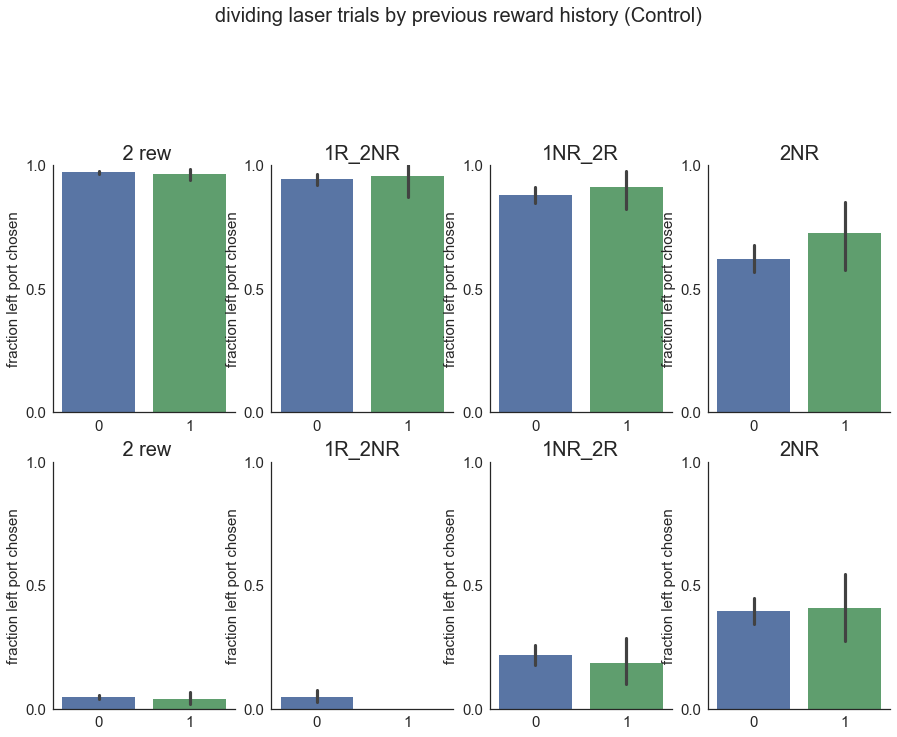

In [15]:
plt.figure(figsize=(15,10))
plt.suptitle('dividing laser trials by previous reward history (Control)',x=0.5,y=1.1,fontsize=20)

sns.set_style('white')
fontsize=15

plt.subplot(241)
sns.barplot(x='1_laser',y='Decision',data = datas[C_boolean_1R_2R] )
plt.ylim(0,1)
plt.title(' 2 rew',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(242)
sns.barplot(x='1_laser',y='Decision',data = datas[C_boolean_1R_2NR] )
plt.ylim(0,1)
plt.title('1R_2NR',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(243)
sns.barplot(x='1_laser',y='Decision',data = datas[C_boolean_1NR_2R] )
plt.ylim(0,1)
plt.title('1NR_2R',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(244)
sns.barplot(x='1_laser',y='Decision',data = datas[C_boolean_1NR_2NR] )
plt.ylim(0,1)
plt.title('2NR',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

## right port in last two trials

plt.subplot(245)
sns.barplot(x='1_laser',y='Decision',data = datas[C_Rboolean_1R_2R] )
plt.ylim(0,1)
plt.title(' 2 rew',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(246)
sns.barplot(x='1_laser',y='Decision',data = datas[C_Rboolean_1R_2NR] )
plt.ylim(0,1)
plt.title('1R_2NR',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(247)
sns.barplot(x='1_laser',y='Decision',data = datas[C_Rboolean_1NR_2R] )
plt.ylim(0,1)
plt.title('1NR_2R',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

plt.subplot(248)
sns.barplot(x='1_laser',y='Decision',data = datas[C_Rboolean_1NR_2NR] )
plt.ylim(0,1)
plt.title('2NR',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.5,1],fontsize=fontsize)
plt.ylabel('fraction left port chosen',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.xlabel('')
sns.despine()

#fig_name = '/Users/Sabatini Lab/GitHub/mouse_bandit/figures/reward_hist_Control_laser_1.eps'
#plt.savefig(fig_name, format='eps', dpi=1000)